In [31]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('credit_scoring_eng.csv')

In [33]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21524 entries, 0 to 21523
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           21524 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [35]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [36]:
print(df.isna().sum())
## obtengo informacion de los valores nulos

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


In [37]:
df['education'] = df['education'].str.lower()

In [38]:
print(df['education'].sort_values().unique())

["bachelor's degree" 'graduate degree' 'primary education'
 'secondary education' 'some college']


In [39]:
df['children'] = df['children'].replace(20, 2)
df['children'] = df['children'].replace(-1, 1)

print(df['children'].sort_values().unique())

[0 1 2 3 4 5]


##convierto valores negativos a positivos

In [40]:
df['days_employed'] = abs(df['days_employed'])

In [41]:
df = df.drop(df[df['dob_years'] == 0].index, axis= 0).reset_index(drop= True)

In [42]:
df['family_status'].sort_values().unique()

array(['civil partnership', 'divorced', 'married', 'unmarried',
       'widow / widower'], dtype=object)

In [43]:
df = df.drop([10701], axis= 0).reset_index(drop= True)

In [44]:
print(df['income_type'].sort_values().unique())

['business' 'civil servant' 'employee' 'entrepreneur'
 'paternity / maternity leave' 'retiree' 'student' 'unemployed']


In [45]:
df.duplicated().sum()

71

In [46]:
df = df.drop_duplicates().reset_index(drop=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21351 entries, 0 to 21350
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21351 non-null  int64  
 1   days_employed     19258 non-null  float64
 2   dob_years         21351 non-null  int64  
 3   education         21351 non-null  object 
 4   education_id      21351 non-null  int64  
 5   family_status     21351 non-null  object 
 6   family_status_id  21351 non-null  int64  
 7   gender            21351 non-null  object 
 8   income_type       21351 non-null  object 
 9   debt              21351 non-null  int64  
 10  total_income      19258 non-null  float64
 11  purpose           21351 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [48]:
df['gender'].value_counts()

gender
F    14101
M     7250
Name: count, dtype: int64

In [49]:
df.drop(df[df['days_employed'] == ''].index, axis=0, inplace=True)

In [56]:
df.drop(df[df['total_income'] == ''].index, axis=0, inplace=True)

In [65]:
df.dropna(subset=['total_income'], inplace=True)

In [66]:
df['days_employed'].value_counts()

days_employed
8437.673028      1
635.915050       1
949.705772       1
3507.818775      1
3620.930977      1
                ..
398099.392433    1
1271.038880      1
1623.362064      1
694.792802       1
1984.507589      1
Name: count, Length: 19258, dtype: int64

In [67]:

credit_risk = df.drop(['education', 'education_id', 'family_status', 'family_status_id', 'gender', 'income_type', 'debt', 'purpose'], axis=1)

In [68]:
credit_risk.head()

,children,days_employed,dob_years,total_income
0,1,8437.673028,42,40620.102
1,1,4024.803754,36,17932.802
2,0,5623.422610,33,23341.752
3,3,4124.747207,32,42820.568
4,0,340266.072047,53,25378.572


In [81]:
centers = range(1, 9)

In [82]:
clusters = [KMeans(n_clusters=center) for center in centers]

In [83]:
# Calculamos el score para cada número de clusters utilizando el algoritmo K-Means
scores = [model.fit(credit_risk).score(credit_risk) for model in clusters]

c:\HSOLUTIONS\2023\NUR\ALGORITMICA AVANZADA\23 06 2023\Riesgo_Crediticio\riesgo_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\HSOLUTIONS\2023\NUR\ALGORITMICA AVANZADA\23 06 2023\Riesgo_Crediticio\riesgo_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\HSOLUTIONS\2023\NUR\ALGORITMICA AVANZADA\23 06 2023\Riesgo_Crediticio\riesgo_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\HSOLUTIONS\2023\NUR\ALGORITMICA AVANZADA\23 06 2023\Riesgo_Crediticio\riesgo_env\lib\site-packages\sklearn\clust

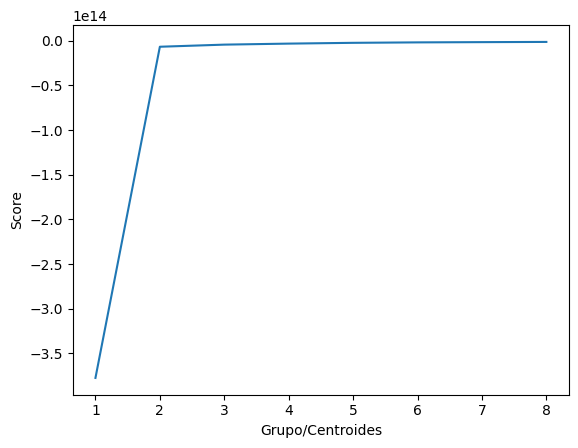

In [84]:
plt.plot(centers, scores)
plt.xlabel('Grupo/Centroides')
plt.ylabel('Score')
plt.show()

In [85]:
k_means = KMeans(n_clusters=5)

In [86]:
k_means.fit(credit_risk)

c:\HSOLUTIONS\2023\NUR\ALGORITMICA AVANZADA\23 06 2023\Riesgo_Crediticio\riesgo_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [87]:
k_means.cluster_centers_

array([[5.42961217e-01, 2.38594028e+03, 4.05459610e+01, 4.13161244e+04],
       [8.37636259e-02, 3.82923838e+05, 5.95456110e+01, 2.21271298e+04],
       [1.09198813e-01, 3.46492854e+05, 5.92860534e+01, 2.17439281e+04],
       [5.69946266e-01, 2.33116796e+03, 3.97205855e+01, 1.97095735e+04],
       [5.93495935e-01, 2.61127076e+03, 4.14796748e+01, 9.55038449e+04]])

In [88]:
credit_risk_groups = [
    'CLIENTE RESGO BAJO',
    'CLIENTE RESGO MEDIO',
    'CLIENTE RESGO ALTO',
    'CLIENTE RESGO MUY ALTO',
    'CLIENTE RESGO EXTREMO'
]

In [105]:
children = 8
days_employed = 400
dob_years= 19
total_income= 500
predicted = k_means.predict([[children,days_employed, dob_years,total_income]])
print(f'Un cliente que tiene {children} hijos, que lleva  {days_employed} dias certificados laboralmente, con  una edad de  {dob_years} años,donde sus ingresos mesuales  ascienden a la suma de {total_income} DOLARES, pertenece al grupo  {credit_risk_groups[predicted[0]]} de nuetro HILTON BANK')

Un cliente que tiene 8 hijos, que lleva  400 dias certificados laboralmente, con  una edad de  19 años,donde sus ingresos mesuales  ascienden a la suma de 500 DOLARES, pertenece al grupo  CLIENTE RESGO MUY ALTO de nuetro HILTON BANK


c:\HSOLUTIONS\2023\NUR\ALGORITMICA AVANZADA\23 06 2023\Riesgo_Crediticio\riesgo_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
